In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import csv
from pylab import *
from patsy import dmatrices

In [2]:
df=pd.read_csv('red-wine-quality.csv')

In [3]:
y=df.quality

In [4]:
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]                         

In [5]:
xArr = X.values
yArr = y.values

# 根据课堂推导岭回归的原理逐步进行代码实现

In [6]:
def ridgeTest(xArr,yArr):
    xMat = xArr; yMat=yArr.T
    yMean = np.mean(yMat) # 数据标准化
    # print(yMean)
    yMat = yMat - yMean
    # print(xMat)
    #regularize X's
    xMeans = np.mean(xMat,0)
    xVar = np.var(xMat,0)
    xMat = (xMat - xMeans) / xVar #（特征-均值）/方差
    numTestPts = 100
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts): # 测试不同的lambda取值，获得系数
        ws = ridgeRegres(xMat,yMat,float(i)/20.0)  #np.exp(i+1)
        wMat[i,:]=ws.T
    return wMat

In [7]:
def ridgeRegres(xMat,yMat,lam=0.01):
    xTx = np.dot(xMat.T, xMat)
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    '''if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return'''
    ws = np.dot(np.linalg.pinv(denom),np.dot(xMat.T,yMat))
    return ws

In [8]:
ridgeWeights = ridgeTest(xArr,yArr)

# 岭迹图（以Beta 1 5 6为例）

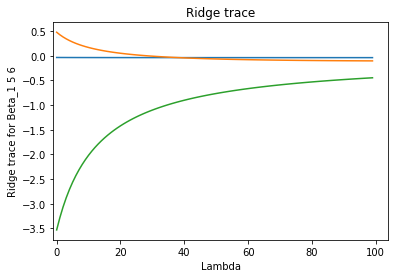

In [9]:
[rows, cols] = ridgeWeights.shape
beta_1 = []
beta_5 = []
beta_6 = []

for i in range(rows):
    beta_1.append(ridgeWeights[i,1])
    beta_5.append(ridgeWeights[i,5])
    beta_6.append(ridgeWeights[i,6])
plt.plot(beta_1, '-')
plt.plot(beta_5,'-')
plt.plot(beta_6,'-')
plt.xlabel('Lambda')
plt.ylabel('Ridge trace for Beta_1 5 6')
plt.title('Ridge trace')
plt.xlim(left=-1);


# 利用sklearn Ridge来实现岭回归

C:\Users\dyw2000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


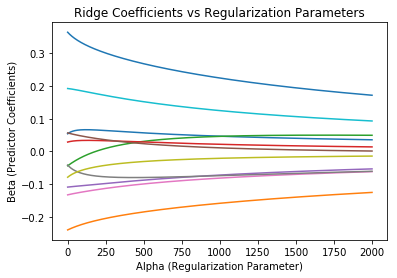

In [10]:
# 数据标准化
df_scaled = preprocessing.scale(df)
df_scaled=pd.DataFrame(df_scaled)

# make response (ys) and predictors (xs)
xs = df_scaled.iloc[:,0:11]
ys = df_scaled.iloc[:,11]

coef=[]
alphas = range(0,2000)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(xs,ys)
  coef.append(ridgereg.coef_)

# Make plot of Beta as a function of Alpha（岭迹图）
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
fig.savefig('coef_vs_alpha.png')


# 交叉验证选择合适的alpha，并输出此时的系数beta和$R^2$

In [14]:
###Selecting lambda
scaler=StandardScaler()
X_std=scaler.fit_transform(xs)

# 通过交叉验证来
regr_cv=RidgeCV(alphas=range(1,2000))
model_cv=regr_cv.fit(X_std,ys)

# 输出最佳的alpha
print(model_cv.alpha_)

# 输出最佳模型的系数
ridgereg=Ridge(alpha=65)
ridgereg.fit(xs,ys)
print(ridgereg.coef_)
ridgereg.score(X_std,ys)
print('\n')
print('R2 = ',ridgereg.score(X_std,ys))

65
[ 0.06489345 -0.22792902 -0.02455042  0.03290715 -0.1062369   0.0494353
 -0.12683766 -0.0626069  -0.06223756  0.18751734  0.33960578]


R2 =  0.36002454192283606
